# Домашнее задание к лекции «Задачи классификации и кластеризации»

## Задание
## Преподаватель: Олег Булыгин

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [19]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [60]:
# загружаем датасет
iris = load_iris()

In [61]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
variety = iris.target

In [62]:
data = data[{'sepal length (cm)','sepal width (cm)'}]

In [63]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, variety, test_size=0.25)

In [64]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [65]:
lda = LinearDiscriminantAnalysis()

In [66]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [67]:
# делаем прогноз на тестовой выборке
y_predict = lda.predict(X_test)

In [119]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, y_predict])
result

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0,2,1,1,2,2,1,0,1,2,...,1,0,2,2,1,2,0,0,1,1
1,0,2,1,1,2,1,2,0,1,1,...,2,0,2,1,1,1,0,0,1,2


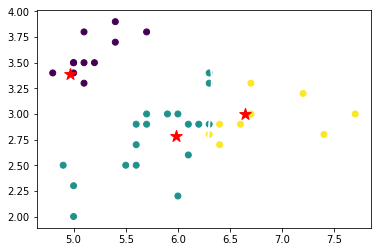

In [77]:
# визуализируем предсказания для тестовой выборки и центры классов
# сам scatter plot
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_predict)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [101]:
# Отбросим целевую переменную и оставим только два признака - sepal_length и sepal_width,
# Подберем оптимальное число кластеров для алгоритма kmeans и визуализируем полученную кластеризацию

In [102]:
from sklearn.cluster import KMeans

In [103]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [115]:
# fit-transform сразу обучается и преобразует данные (возьмем X_test)
X_scaled = scaler.fit_transform(X_test)

In [116]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)

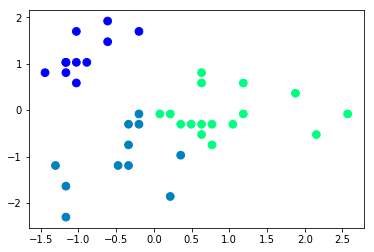

In [117]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='winter', c=clusters, s=60)

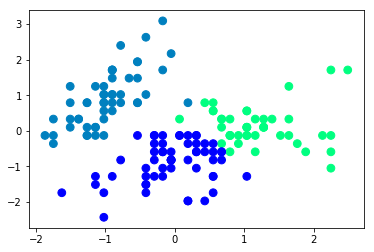

In [121]:
# fit-transform сразу обучается и преобразует данные (возьмем полный набор данных)
X_scaled = scaler.fit_transform(data)
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='winter', c=clusters, s=60)